### SENTIMENT CLASSIFICATION WITH LSTM NETWORKS USING KERAS

### Introduction to KERAS



Keras is a high level deep learning and neural network API written in Python. It is capable of running on top of Tensorflow, Theano, or CNTK

In [2]:
# Importing the classes and functions required for this model 
import numpy as np
import keras.backend as K
from keras import losses,optimizers
from keras.utils import np_utils, to_categorical
from keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, Dropout, TimeDistributed, Bidirectional, Embedding, Flatten, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


Large Movie Review Dataset (IMDB dataset)

Dataset obtained from https://ai.stanford.edu/~amaas/data/sentiment/

In [3]:
# read train data

In [4]:
import os
x_train = []
y_train = []

# store positive train data
path1_train = './aclImdb/train/pos/'         
for file in os.listdir(path1_train):
    x_train.append(open(path1_train + file, encoding="utf8").read())

for i in range(len(os.listdir(path1_train))):
    y_train.append(1)
    
# store negative train data
path2_train = './aclImdb/train/neg/'
for file in os.listdir(path2_train):
    x_train.append(open(path2_train + file, encoding="utf8").read())
    
for i in range(len(os.listdir(path2_train))):
    y_train.append(0)

In [5]:
# read test data

In [6]:
x_test = []
y_test = []

# store positive test data
path1_test = './aclImdb/test/pos/'         
for file in os.listdir(path1_test):
    x_test.append(open(path1_test + file, encoding="utf8").read())

for i in range(len(os.listdir(path1_test))):
    y_test.append(1)
    
# store negative test data
path2_test = './aclImdb/test/neg/'
for file in os.listdir(path2_test):
    x_test.append(open(path2_test + file, encoding="utf8").read())
    
for i in range(len(os.listdir(path2_test))):
    y_test.append(0)

In [98]:
# print x_train data 
x_train

['',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they\'ll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it\'s like to be homeless? That is Goddard Bolt\'s lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days 

In [60]:
# print the length of x_train and y_train
print(len(x_train), len(y_train))

25000 25000


In [61]:
# print the length of X_test and y_test
print(len(x_test),len(y_test))

25000 25000


In [62]:
x_train[-1]

"This is one of the dumbest films, I've ever seen. It rips off nearly ever type of thriller and manages to make a mess of them all.<br /><br />There's not a single good line or character in the whole mess. If there was a plot, it was an afterthought and as far as acting goes, there's nothing good to say so Ill say nothing. I honestly cant understand how this type of nonsense gets produced and actually released, does somebody somewhere not at some stage think, 'Oh my god this really is a load of shite' and call it a day. Its crap like this that has people downloading illegally, the trailer looks like a completely different film, at least if you have download it, you haven't wasted your time or money Don't waste your time, this is painful."

In [63]:
x_test[-1]

'David Bryce\'s comments nearby are exceptionally well written and informative as almost say everything I feel about DARLING LILI. This massive musical is so peculiar and over blown, over produced and must have caused ruptures at Paramount in 1970. It cost 22 million dollars! That is simply irresponsible. DARLING LILI must have been greenlit from a board meeting that said "hey we got that Pink Panther guy and that Sound Of Music gal... lets get this too" and handed over a blank cheque. The result is a hybrid of GIGI, ZEPPELIN, HALF A SIXPENCE, some MGM 40s song and dance numbers of a style (daisies and boaters!) so hopelessly old fashioned as to be like musical porridge, and MATA HARI dramatics. The production is colossal, lush, breathtaking to view, but the rest: the ridiculous romance, Julie looking befuddled, Hudson already dead, the mistimed comedy, and the astoundingly boring songs deaden this spectacular film into being irritating. LILI is like a twee 1940s mega musical with some

In [64]:
print(y_train[0])
print(y_train[-1])
print(y_test[0])
print(y_test[-1])

1
0
1
0


### Word Embedding

Word Embeddings is a technique where the individual words in text are represented as lower dimensional real valued vectors. These improve the ability of neural networks to learn from text as the neural networks can only learn from the numerical data. Therefore,word embedding is important for solving most of the NLP problems. 

I have used Tokenizer utility class to vectorize the text into list of integers where each integer maps to a value in a dictionary and the vocabulary terms being the keys in the dictionary. There is paramater called num_words which is used for setting the size of the vocabulary.   

In [7]:
# create the tokenizer
to_obj=Tokenizer()
# concatenate x_train and x_test lists
total_reviews=x_train+x_test
# fit the tokenizer on total reviews
to_obj.fit_on_texts(total_reviews)
# obtain maximum length of reviews from tota reviews 
max_len = max([len(s.split()) for s in total_reviews])
max_len

2470

In [8]:
# print the words count
print(to_obj.word_counts)

OrderedDict([('homelessness', 9), ('or', 35746), ('houselessness', 1), ('as', 91728), ('george', 1631), ('carlin', 28), ('stated', 251), ('has', 33036), ('been', 18348), ('an', 42932), ('issue', 588), ('for', 87450), ('years', 8735), ('but', 83495), ('never', 12963), ('a', 322796), ('plan', 823), ('to', 268073), ('help', 3687), ('those', 9389), ('on', 68015), ('the', 666748), ('street', 1292), ('that', 136982), ('were', 21206), ('once', 4605), ('considered', 919), ('human', 3197), ('who', 40623), ('did', 12588), ('everything', 4796), ('from', 40481), ('going', 8177), ('school', 3487), ('work', 8536), ('vote', 496), ('matter', 2446), ('most', 17369), ('people', 17828), ('think', 14335), ('of', 289375), ('homeless', 194), ('just', 35154), ('lost', 2920), ('cause', 989), ('while', 10361), ('worrying', 73), ('about', 34151), ('things', 7318), ('such', 10001), ('racism', 342), ('war', 4424), ('iraq', 148), ('pressuring', 10), ('kids', 3586), ('succeed', 305), ('technology', 431), ('election

In [8]:
# print the words index
print(to_obj.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'be': 26, 'one': 27, 'he': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'so': 34, 'who': 35, 'from': 36, 'like': 37, 'or': 38, 'just': 39, 'her': 40, 'out': 41, 'about': 42, 'if': 43, "it's": 44, 'has': 45, 'there': 46, 'some': 47, 'what': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'my': 56, 'even': 57, 'would': 58, 'she': 59, 'which': 60, 'only': 61, 'really': 62, 'see': 63, 'story': 64, 'their': 65, 'had': 66, 'can': 67, 'me': 68, 'well': 69, 'were': 70, 'than': 71, 'much': 72, 'we': 73, 'bad': 74, 'been': 75, 'get': 76, 'do': 77, 'great': 78, 'other': 79, 'will': 80, 'also': 81, 'into': 82, 'people': 83, 'because': 84, 'how': 85, 'first': 86, 'him': 87, 'most': 88, "don't":

In [9]:
# total number of words
len_vocab = len(to_obj.word_index)+1
len_vocab

124253

In [10]:
### I have used pad_sequences to convert the sequences into 2-D numpy array.

In [11]:
# converts the words to integer sequences 
x_train_tokens = to_obj.texts_to_sequences(x_train)
x_test_tokens = to_obj.texts_to_sequences(x_test)
# pads sequences to same length
x_train_pad = pad_sequences(x_train_tokens,maxlen=max_len,padding='post')
x_test_pad = pad_sequences(x_test_tokens,maxlen=max_len,padding='post')

In [12]:
print('x_train shape:', x_train_pad.shape)
print('x_test shape:', x_test_pad.shape)

x_train shape: (25000, 2470)
x_test shape: (25000, 2470)


In [26]:
print(x_train[-1])
print(x_train_tokens[-1])

This is one of the dumbest films, I've ever seen. It rips off nearly ever type of thriller and manages to make a mess of them all.<br /><br />There's not a single good line or character in the whole mess. If there was a plot, it was an afterthought and as far as acting goes, there's nothing good to say so Ill say nothing. I honestly cant understand how this type of nonsense gets produced and actually released, does somebody somewhere not at some stage think, 'Oh my god this really is a load of shite' and call it a day. Its crap like this that has people downloading illegally, the trailer looks like a completely different film, at least if you have download it, you haven't wasted your time or money Don't waste your time, this is painful.
[11, 6, 27, 4, 1, 7047, 104, 198, 123, 107, 9, 7576, 122, 801, 123, 543, 4, 704, 2, 1019, 5, 94, 3, 954, 4, 93, 29, 7, 7, 222, 21, 3, 689, 49, 347, 38, 108, 8, 1, 223, 954, 43, 46, 13, 3, 111, 9, 13, 32, 10796, 2, 14, 225, 14, 113, 269, 222, 161, 49, 5,

In [27]:
x_train_pad[-1]

array([11,  6, 27, ...,  0,  0,  0])

In [133]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                14976     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 16271s 651ms/step - loss: 0.6660 - acc: 0.6155 - val_loss: 0.5557 - val_acc: 0.7461
Epoch 2/4
25000/25000 [==============================] - 6922s 277ms/step - loss: 0.4337 - acc: 0.8226 - val_loss: 0.4486 - val_acc: 0.8061
Epoch 3/4
25000/25000 [==============================] - 6

In [135]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=5,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 7936s 317ms/step - loss: 0.6829 - acc: 0.5729 - val_loss: 0.6375 - val_acc: 0.6735
Epoch 2/5
25000/25000 [==============================] - 8253s 330m

In [136]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=5,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_8 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8089s 324ms/step - loss: 0.6836 - acc: 0.5666 - val_loss: 0.6406 - val_acc: 0.6337
Epoch 2/5
25000/25000 [==============================] - 7841s 314m

In [ ]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=1000,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                34048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,459,413
Trainable params: 12,459,413
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 13690s 548ms/step - loss: 0.6906 - acc: 0.5326 - val_loss: 0.6836 - val_acc: 0.5894
Epoch 2/4
25000/25000 [==============================] - 18147s 72

In [14]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
RMS = optimizers.RMSprop(lr =0.001)
model.compile(loss='binary_crossentropy', optimizer=RMS, metrics=['accuracy']) 
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2072s 83ms/step - loss: 0.6360 - acc: 0.6679 - val_loss: 0.5223 - val_acc: 0.8080
Epoch 2/4
25000/25000 [==============================] - 2480s 99ms/

In [31]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
RMS = optimizers.RMSprop(lr =0.001)
model.compile(loss='binary_crossentropy', optimizer=RMS, metrics=['accuracy']) 
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=10,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4670s 187ms/step - loss: 0.6617 - acc: 0.6158 - val_loss: 0.5348 - val_acc: 0.7860
Epoch 2/10
25000/25000 [==============================] - 4634s 18

In [32]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=10,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                14976     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4458s 178ms/step - loss: 0.6745 - acc: 0.5948 - val_loss: 0.5990 - val_acc: 0.6883
Epoch 2/10
25000/25000 [==============================] - 4452s 178ms/step - loss: 0.4612 - acc: 0.8065 - val_loss: 0.4330 - val_acc: 0.8224
Epoch 3/10
25000/25000 [==============================] -

In [34]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
RMS = optimizers.RMSprop(lr=0.0008)
model.compile(loss='binary_crossentropy', optimizer=RMS, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 8829s 353ms/step - loss: 0.6850 - acc: 0.5685 - val_loss: 0.6572 - val_acc: 0.6431
Epoch 2/4
25000/25000 [==============================] - 5916s 237m

In [43]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
RMS = optimizers.RMSprop(lr=0.0008)
model.compile(loss='binary_crossentropy', optimizer=RMS, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_9 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 6141s 246ms/step - loss: 0.6682 - acc: 0.6029 - val_loss: 0.5568 - val_acc: 0.7630
Epoch 2/4
25000/25000 [==============================] - 6357s 254m

In [21]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
RMS = optimizers.RMSprop(lr =0.001)
model.compile(loss='binary_crossentropy', optimizer=RMS, metrics=['accuracy'])
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 7493s 300ms/step - loss: 0.6365 - acc: 0.6532 - val_loss: 0.5438 - val_acc: 0.7706
Epoch 2/4
25000/25000 [==============================] - 7481s 299ms/step - loss: 0.4620 - acc: 0.8310 - val_loss: 0.5154 - val_acc: 0.7536
Epoch 3/4
25000/25000 [==============================] - 7496s 300ms/step - loss: 0.3568 - acc: 0.8836 - val_loss: 0.3654 - val_acc: 0.8599
Epoch 4/4
25000/25000 [==============================] - 7457s 298ms/step - loss: 0.3120 - acc: 0.9024 - val_loss: 0.3796 - val_acc: 0.8512


In [6]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,64,input_length=max_len))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=1000,validation_data=[x_test_pad, y_test],shuffle=True)

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 11235s 449ms/step - loss: 0.6902 - acc: 0.5488 - val_loss: 0.6828 - val_acc: 0.6224
Epoch 2/4
25000/25000 [==============================] - 17204s 688ms/step - loss: 0.6004 - acc: 0.7094 - val_loss: 0.5231 - val_acc: 0.7827
Epoch 3/4
25000/25000 [==============================] - 20504s 820ms/step - loss: 0.4284 - acc: 0.8384 - val_loss: 0.4256 - val_acc: 0.8264
Epoch 4/4
25000/25000 [==============================] - 30875s 1s/step - loss: 0.3148 - acc: 0.8992 - val_loss: 0.3689 - val_acc: 0.8525


In [39]:
# create the model
model=Sequential()
model.add(Embedding(len_vocab,100,input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(1, activation='sigmoid'))
RMS = optimizers.RMSprop(lr=0.0008)
model.compile(loss='binary_crossentropy', optimizer=RMS, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train_pad,y_train,epochs=4,batch_size=500,validation_data=[x_test_pad, y_test],shuffle=True)
# Evaluate the model
scores = model.evaluate(x_test_pad, y_test)
print('Accuracy: %.2f%%' % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 2470, 100)         12425300  
_________________________________________________________________
bidirectional_8 (Bidirection (None, 32)                14976     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 12,440,309
Trainable params: 12,440,309
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 6379s 255ms/step - loss: 0.6430 - acc: 0.6528 - val_loss: 0.5326 - val_acc: 0.7964
Epoch 2/4
25000/25000 [==============================] - 6745s 270ms/step - loss: 0.4583 - acc: 0.8330 - val_loss: 0.4548 - val_acc: 0.8192
Epoch 3/4
25000/25000 [==============================] - 69

In [42]:
print(model.predict(x_test_pad))
model.save('Predict_LSTM.h5')

[[0.8906223 ]
 [0.84906125]
 [0.8824338 ]
 ...
 [0.8577635 ]
 [0.5531829 ]
 [0.8119694 ]]


In [27]:
from keras.models import load_model

model = load_model('Predict_LSTM.h5')
y_pred = model.predict_classes(x_test_pad)

Confusion Matrix:
 [[10779  1721]
 [ 1652 10848]]


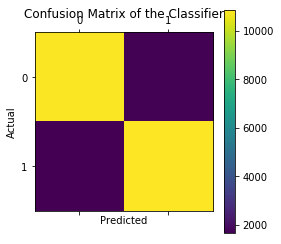

In [41]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
pl.matshow(cm)
pl.title('Confusion Matrix of the Classifier')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.colorbar()
pl.show()

### References
* https://keras.io/
* https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.bib
* https://ai.stanford.edu/~amaas/data/sentiment/
* https://machinelearningmastery.com/what-are-word-embeddings/
* https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
* https://realpython.com/python-keras-text-classification/#what-is-a-word-embedding